# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

17 campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

In [115]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [116]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [117]:
df.isnull().mean()

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [119]:
# rename column y to be more descriptive "subscribe"
df.rename(columns = {'y' : 'subscribe'}, inplace=True)

In [120]:
# distribution of the numerical parameters 
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [121]:
df['subscribe'].value_counts()

subscribe
no     36548
yes     4640
Name: count, dtype: int64

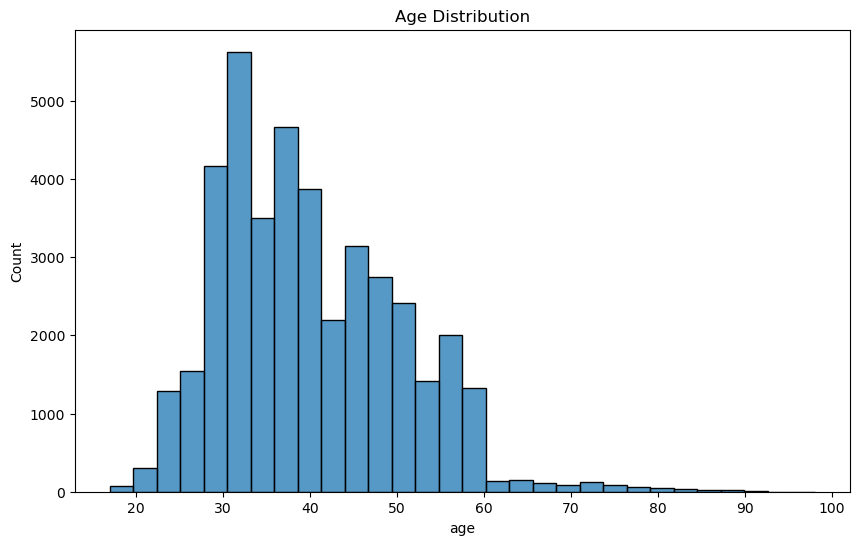

In [122]:
#Age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30)
plt.title('Age Distribution')
plt.show()

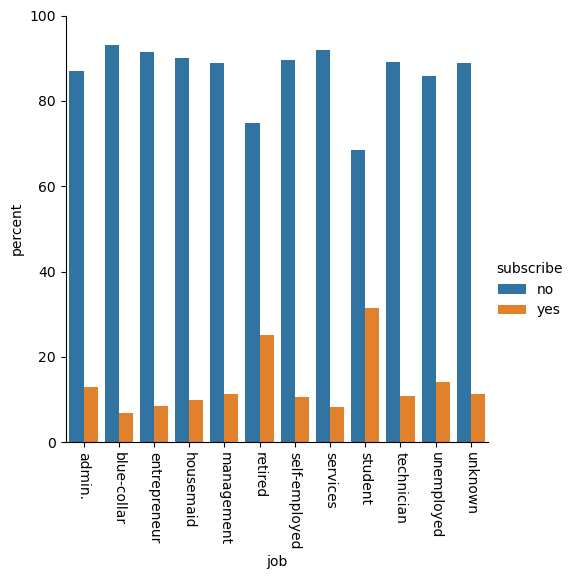

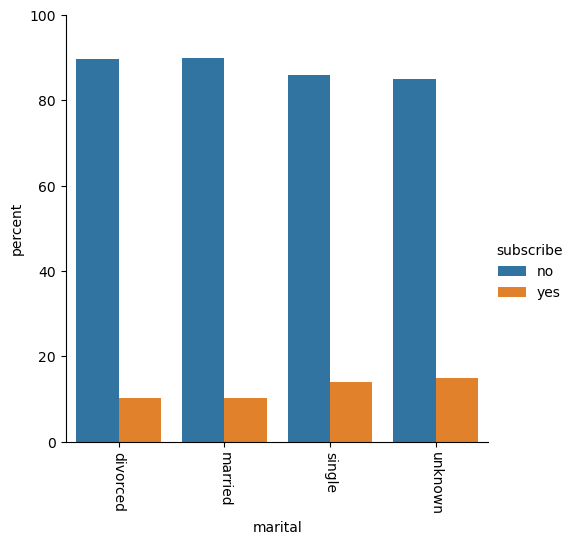

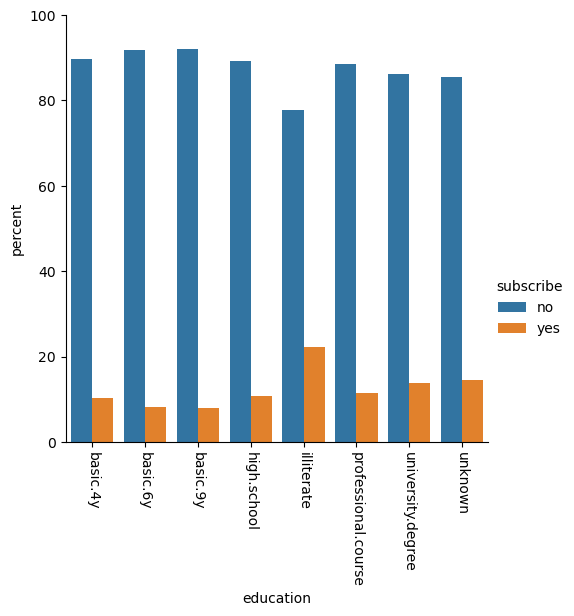

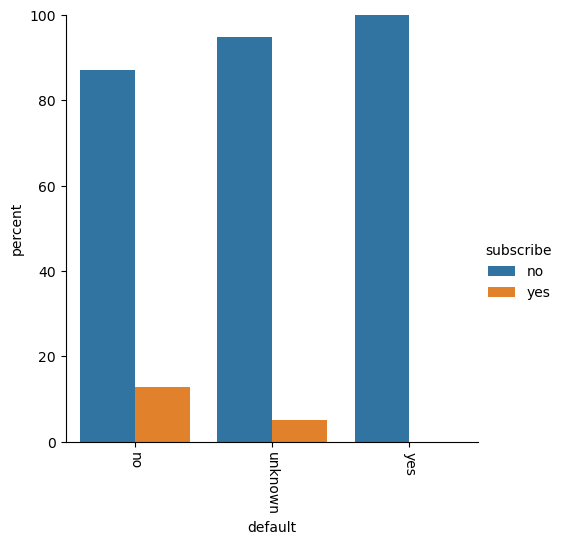

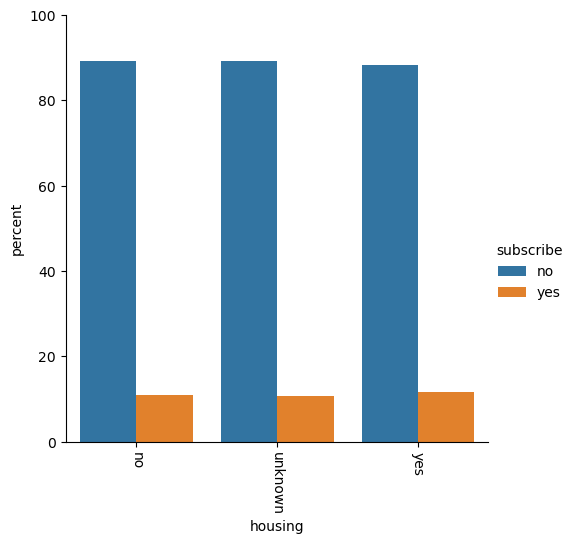

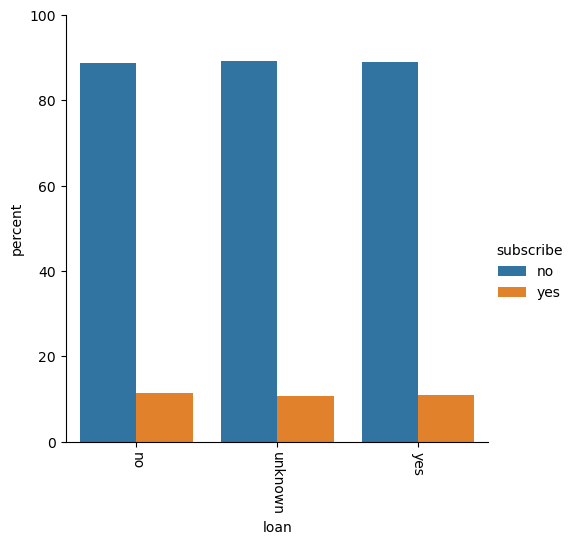

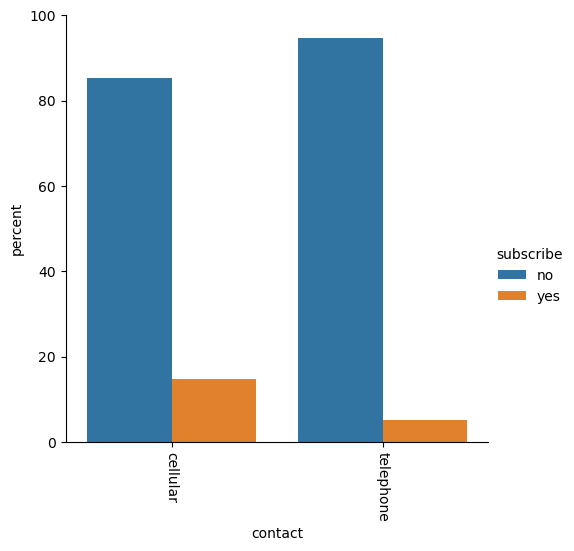

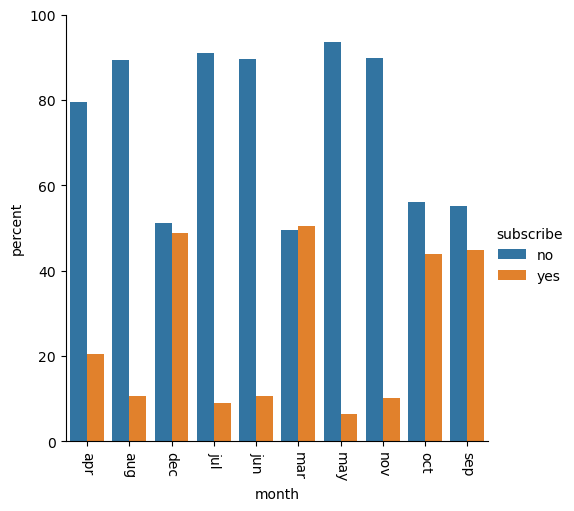

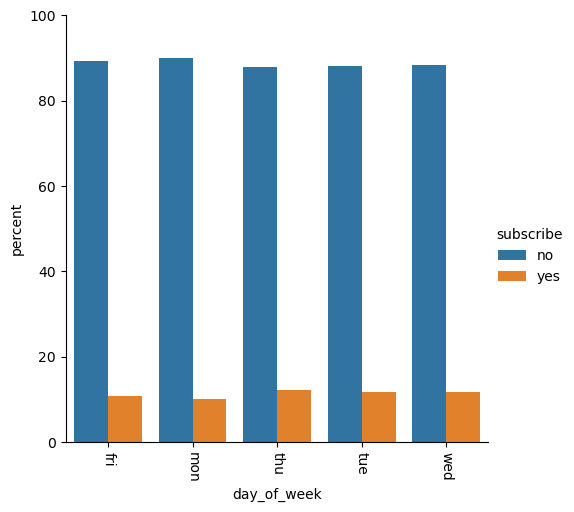

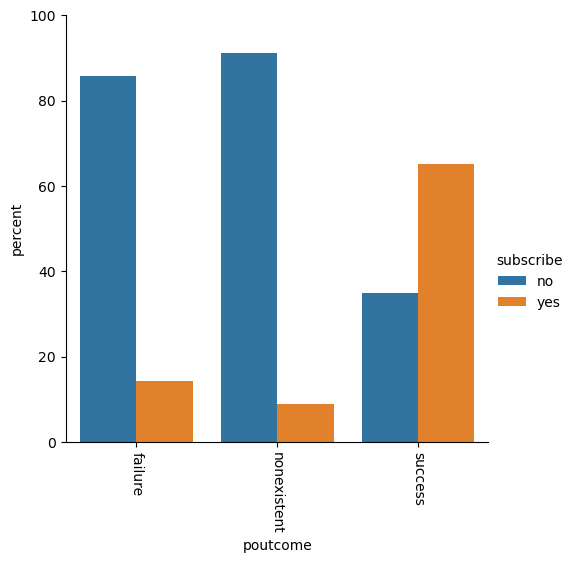

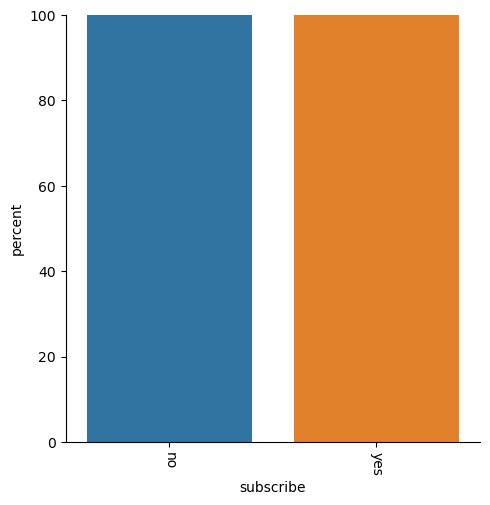

In [123]:
# distrbution of categorical columns
cat_col = df.select_dtypes(include=['object']).columns
for i, col in enumerate(cat_col):
    df1 = df.groupby(col)['subscribe'].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=col,y='percent',hue='subscribe',kind='bar',data=df1)
    g.ax.set_ylim(0,100)
    plt.xticks(rotation=-90)
    

#### Observations - 
##### Data Understanding
1. The column types match the data type, except "nr.employed" which could be changed to a int64 instead of float64
2. The dataset does not have any nulls in the columns
3. Values of numerical columns are well distributed
4. Age has normal distribution

##### Exploratory Data Analysis
The features that have the higest percent of subscription are
1. students and retired in job category
2. single in marital status category
3. illiterate under education
4. cellular phone previous contact
5. in the months of March, December, Sept and Oct for previous call
6. if the outcome of previous call was a success

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

#### Business Objective - 
The objective of this exercise is to find the relationship between the campaign factors and individual demographics influences the conversion rate of a client subscribing to a term deposit or not. We will do that by creating a machine learning model that will predict the likelihood of success of a campaign, given its details. 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [124]:
# drop non-bank related features
non_bank_cols = ['emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
df.drop(columns = non_bank_cols, inplace = True)

In [125]:
#create  input and output df
X = df.drop(['subscribe'],axis=1)
y = df['subscribe']

print(X.shape)
print(y.shape)

(41188, 15)
(41188,)


In [126]:
# categorical columns
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
#numerical columns
num_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']

In [127]:
# map subscribe to 1/0 
y = LabelEncoder().fit_transform(df['subscribe'])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [128]:
#make train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(28831, 15) (12357, 15)


In [129]:
# create transformer of onhotencoding the categorical columns and scaling the numerical columns
col_transformer = make_column_transformer(
    (OneHotEncoder(), cat_columns),
     remainder= StandardScaler() 
)


X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [133]:
# the baseline for classification model would be assumption of the majority output
(y_train==0).mean()

0.8872394297804447

In [134]:
#assuming all values are predicted as majority 0
#accuracy score of basline model

baseline_score_train = (y_train==0).mean()
baseline_score_test = (y_test==0).mean()
print(f'Accuracy score of Basleline model training set is {round(baseline_score_train,2)}')
print(f'Accuracy score of Basleline model test set is {round(baseline_score_test,2)}')

Accuracy score of Basleline model training set is 0.89
Accuracy score of Basleline model test set is 0.89


**The accuracy for a model to beat is the baseline of 0.89**

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [135]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

lgr_score_train = accuracy_score(lgr.predict(X_train), y_train)
lgr_score_test = accuracy_score(lgr.predict(X_test), y_test)
print(f'Accuracy score of Logistic Regression model training set is {round(lgr_score_train,2)}')
print(f'Accuracy score of Logistic Regression model test set is {round(lgr_score_test,2)}')

Accuracy score of Logistic Regression model training set is 0.91
Accuracy score of Logistic Regression model test set is 0.91


### Problem 9: Score the Model

What is the accuracy of your model?

In [136]:
print(f'Accuracy score of Logistic Regression model training set is {round(lgr_score_train,2)}')
print(f'Accuracy score of Logistic Regression model test set is {round(lgr_score_test,2)}')
print('Classification Report:')
print(classification_report(y_test, lgr.predict(X_test)))

Accuracy score of Logistic Regression model training set is 0.91
Accuracy score of Logistic Regression model test set is 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10968
           1       0.67      0.36      0.47      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.67      0.71     12357
weighted avg       0.89      0.91      0.90     12357



Logistic Regression model has an accuracy of 0.91. Considering weighted average since the set is imbalanced, the model has a recall of 0.91 (the model getsidentifies 91% of all true positives) and precision of 0.89  (the model has 89% accuracy in its positive bin). 

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [137]:
models = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(),SVC()]

In [138]:
# fit all models
#store outputs in dataframe
df_results = pd.DataFrame()
for model in models:
    start_time = time.perf_counter()
    model.fit(X_train, y_train)
    end_time = time.perf_counter()
    execution_time = end_time - start_time

    y_pred_train = model.predict(X_train)
    score_train = accuracy_score(y_pred_train, y_train)
    y_pred_test = model.predict(X_test)
    score_test = accuracy_score(y_pred_test, y_test) 
    new_row = pd.DataFrame([{'Model': model, 'Train Time': execution_time, 'Train Accuracy': score_train, 'Test Accuracy': score_test}])
    df_results = pd.concat([df_results, new_row], ignore_index=True)
    
df_results

,Model,Train Time,Train Accuracy,Test Accuracy
0,LogisticRegression(),0.169767,0.906975,0.907906
1,KNeighborsClassifier(),0.025349,0.921994,0.903860
2,DecisionTreeClassifier(),0.819839,1.000000,0.876103
3,SVC(),22.445995,0.915646,0.907906


**Model Comparison-** 
- Decision Tree has a high accuracy on training set, but a large drop in accuracy for test set. This shows that the model may be overfitting
- KNN takes the least amount of time to compute and has second best accuracy
- Simple logistic regression gives the same accuracy as a computationally expensive SVM

Conclusion - Comparing models with default settings, Logistic Regression model performs best with second lowest computation time.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [140]:
# hyperparameter tuning
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': [0.01, 0.1, 1, 10],
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [3, 5, 10],
            'min_samples_split': [2,5,10]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [5, 7, 10, 15]
        }
    },
   # 'SVM': {   # SVM is taking oo long to optimize hyperparameters
   #      'model': SVC(),
   #      'param_grid': {
   #          'C': [0.1, 1, 10],
   #          'kernel': ['linear'],
   #          'gamma': ['scale', 'auto']
   #      }
   #  }
}

In [141]:
#hyper paramter tuning and storing best reults in df 
df_results2 = pd.DataFrame() 

for model_name, grid_info in param_grids.items():
    grid = GridSearchCV(estimator = grid_info['model'], param_grid= grid_info['param_grid'], cv=5)
    start_time = time.time()  
    # Fit the model
    grid.fit(X_train, y_train)

    end_time = time.time()
    train_time = end_time - start_time

    best_model = grid.best_estimator_
    best_params = grid.best_params_
    best_score = grid.best_score_

    y_pred_test = best_model.predict(X_test)
    score_test = accuracy_score(y_test, y_pred_test)

    new_row = pd.DataFrame([{'Model': best_model, 'Train Time': train_time, 'Train Accuracy': best_score, 'Test Accuracy': score_test}])
    df_results2 = pd.concat([df_results2, new_row], ignore_index=True)

df_results2

,Model,Train Time,Train Accuracy,Test Accuracy
0,LogisticRegression(C=1),1.408061,0.906559,0.907906
1,"DecisionTreeClassifier(max_depth=5, min_sample...",3.712635,0.908050,0.909768
2,KNeighborsClassifier(n_neighbors=15),172.380429,0.901530,0.905560


In [143]:
pd.set_option("display.max_colwidth", None)
df_results2

,Model,Train Time,Train Accuracy,Test Accuracy
0,LogisticRegression(C=1),1.408061,0.906559,0.907906
1,"DecisionTreeClassifier(max_depth=5, min_samples_split=10)",3.712635,0.908050,0.909768
2,KNeighborsClassifier(n_neighbors=15),172.380429,0.901530,0.905560


**Model Comparison -**
1. Decision Tree with tree depth of 5 and min_sample_split of 10 has the highest accuracy of 91%
2. Logistic Regression is the most time efficient and is a close second at 90.8% accuracy

**Further Optimization--**
1. Feature optimization can be done to exclude non-essential features and identify the most influential features
2. Further tune hyper parameters. And include SVM model tuning.

##### Questions